In [1]:
# Installs
#!pip3 install pillow
#!pip3 install torch
#!pip3 install torchvision

In [2]:
# Imports
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import scipy.signal
# Functions in imageProcessing.py
from imageProcessing import resizeImg, generateMask

In [3]:
# if SSL error:
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

(2000, 1500)


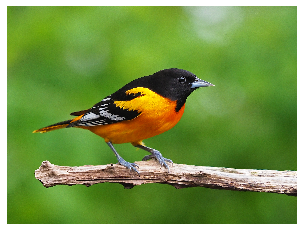

In [4]:
# Load Photo ########### Lo Hacen Ellos
img = Image.open('images/bird.png')
plt.axis('off')
plt.imshow(img)
print(img.size)

In [5]:
# Resize Photo ########### Lo Hacen Ellos
img = resizeImg(img,256)
print(img.size)

(341, 256)


In [6]:
# Generate Mask 
mask = generateMask(img)
background_mask = np.all(mask == [0, 0, 0], axis=-1)
foreground_mask = np.any(mask != [0, 0, 0], axis=-1)

In [7]:
# Convert image to np.array ########### Lo Hacen Ellos
img = np.array(img)
# Apply Mask / Separate Foreground and Background ########### Lo Hacen Ellos
foreground, background = img.copy(),img.copy()
foreground[background_mask] = [0,0,0]
background[foreground_mask] = [0,0,0]

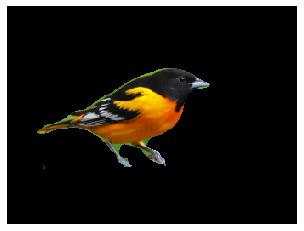

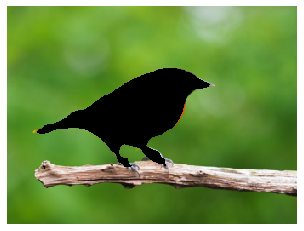

In [8]:
plt.axis('off')
plt.imshow(foreground)
plt.figure()
plt.axis('off')
plt.imshow(background)

Black and White

In [9]:
fore = Image.fromarray(foreground)
fore_bnw = fore.convert('L')

back = Image.fromarray(background)
back_bnw = back.convert('L')

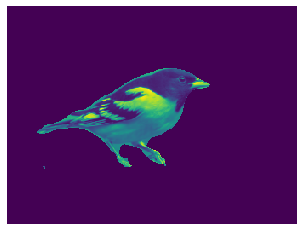

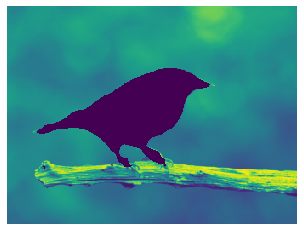

In [10]:
plt.axis('off')
plt.imshow(fore_bnw)
plt.figure()
plt.axis('off')
plt.imshow(back_bnw)

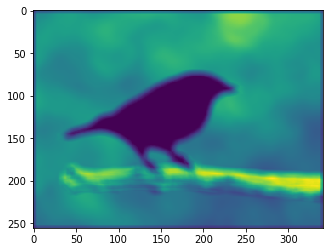

In [11]:
back_np = np.array(back_bnw)
matrix = np.random.random((10,10))
conv = scipy.signal.convolve2d(back_np, matrix, mode='same',boundary='symm')
conv = conv//(np.max(conv)/255)

back_blur = np.absolute(conv)

plt.imshow(back_blur)

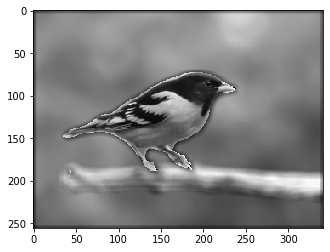

In [12]:
final = np.add(back_blur, fore_bnw).astype(np.uint8)
plt.imshow(final, cmap='gray')

In [13]:
# Bluring Function ########### Lo Hacen Ellos, no hace falta que sea una funcion. Con que apliquen el filtro a 
# los 3 canales y los ordenen despues, perfect. Hay que ver como guiarles para que entiendan como hacer.
def blur(im, blur_param=10):
    kernel=np.random.random((blur_param,blur_param))
    image = []
    for c in range(3):
        # Darles la funcion scipy.signal ?
        blured_channel = scipy.signal.convolve2d(im[:,:,c],kernel,mode='same',boundary='symm')
        # Explicar lo de la division por 255 ?
        blured_channel = blured_channel//(np.max(blured_channel)/255)
        image.append(blured_channel)
    image = np.stack(image,axis=-1).astype(np.uint8)
    return image

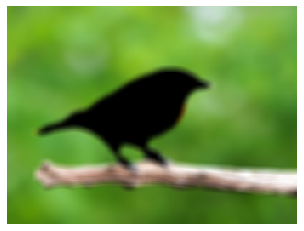

In [14]:
# Bluring Background ########### Lo Hacen Ellos
blured_back = blur(background) 
plt.axis('off')
plt.imshow(blured_back);

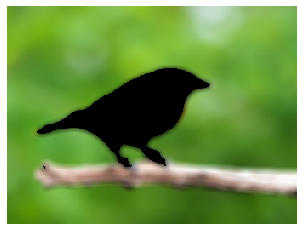

In [15]:
# Reapply Mask ########### Lo Hacen Ellos, Decir que tienen que hacerlo
blured_back[foreground_mask] = [0,0,0]
plt.axis('off')
plt.imshow(blured_back);

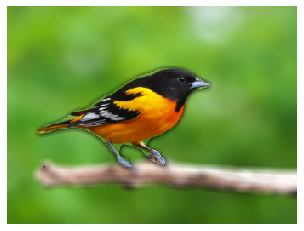

In [16]:
# Sum Blured Background and Foreground ########### Lo Hacen Ellos
photo = np.add(blured_back,foreground)
plt.axis('off')
plt.imshow(photo);

In [17]:
# Export Blured Image ########### Lo Hacen Ellos
photo = Image.fromarray(photo,"RGB")
photo.save("images/blured_bird.JPG")